## Read in Restaurant Data

In [37]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# read in restaurants data and convert serveral date columns to date type
restaurants = pd.read_csv("restaurants.csv", parse_dates=['INSPECTION DATE', 'GRADE DATE', 'RECORD DATE'])
restaurants.shape

(400120, 26)

In [38]:
# get rid of uneccesary warning
pd.set_option('mode.chained_assignment', None)

In [39]:
# convert columna name to lowercase, and replace space with underscore
restaurants.columns = restaurants.columns.str.lower().str.replace(" ", "_")

In [40]:
# check # of unique restaurant ID to
len(restaurants["camis"].unique())

28564

## Check Quality of Restaurant Data

In [41]:
# calcuate missing value percentage for each column
# grade_date and grade are half missing. Fortuntaely, score is only has 4% missing, and grade is correlated to score
# "A" grade: 0 to 13 points for sanitary violations 
# "B" grade: 14 to 27 points for sanitary violations 
# "C" grade: 28 or more points for sanitary violations https://a816-health.nyc.gov/ABCEatsRestaurants/#/faq

missing_pct = restaurants.isnull().mean() * 100
missing_pct = missing_pct.to_frame(name="missing_pct")
missing_pct.sort_values(by='missing_pct', ascending=False)

,missing_pct
grade_date,50.078976
grade,49.447166
score,4.507148
violation_description,2.577227
critical_flag,2.577227
bin,2.498001
census_tract,2.052884
council_district,2.052884
community_board,2.052884
nta,2.052884


## Check Inspecation Type

In [42]:
restaurants.inspection_type.unique()

array(['Cycle Inspection / Re-inspection',
       'Cycle Inspection / Initial Inspection', nan,
       'Pre-permit (Operational) / Initial Inspection',
       'Pre-permit (Non-operational) / Initial Inspection',
       'Smoke-Free Air Act / Re-inspection',
       'Administrative Miscellaneous / Re-inspection',
       'Pre-permit (Operational) / Re-inspection',
       'Trans Fat / Initial Inspection',
       'Cycle Inspection / Reopening Inspection',
       'Inter-Agency Task Force / Initial Inspection',
       'Calorie Posting / Initial Inspection',
       'Administrative Miscellaneous / Initial Inspection',
       'Pre-permit (Operational) / Reopening Inspection',
       'Pre-permit (Operational) / Compliance Inspection',
       'Smoke-Free Air Act / Initial Inspection',
       'Pre-permit (Non-operational) / Compliance Inspection',
       'Calorie Posting / Re-inspection', 'Trans Fat / Re-inspection',
       'Pre-permit (Operational) / Second Compliance Inspection',
       'Administr

## Data Wrangling

In [43]:
# filter the valid records of inspection data

c1 = restaurants.inspection_type.isin(['Cycle Inspection / Re-inspection', 'Pre-permit (Operational) / Re-inspection'])
c2 = restaurants.inspection_type.isin(['Cycle Inspection / Initial Inspection', 'Pre-permit (Operational) / Initial Inspection'])
c3 = restaurants.score <= 13
c4 = restaurants.inspection_type.isin(['Pre-permit (Operational) / Reopening Inspection', 'Cycle Inspection / Reopening Inspection'])
c5 = restaurants.grade.isin(['A', 'B', 'C', 'P', 'Z'])

conditions = (c1) | (c2 & c3) | (c4 & c5)

restaurants = restaurants.loc[conditions, :]
restaurants.shape

(220673, 26)

In [44]:
# further cleaning to only keep score !=-1 or score == -1 and grade is either B or C

c6 = restaurants.score != -1
c7 = (restaurants.score == -1) & (restaurants.grade.isin(['B', 'C']))
restaurants = restaurants.loc[c6 | c7, :]
restaurants.shape

(219678, 26)

In [45]:
# drop rows with missing score
restaurants = restaurants.dropna(subset = ["score"])
restaurants.shape

(219678, 26)

In [46]:
# test if there are multiple scores in the same inspection date for a restaurant
# result: all scores are the same on the same inspection date for all restaurants

restaurants.groupby(by=["camis", "inspection_date"])["score"].nunique().unique()

array([1], dtype=int64)

In [47]:
# double check missing value percentage

missing_pct = restaurants.isnull().mean() * 100
missing_pct = missing_pct.to_frame(name="missing_pct")
missing_pct.sort_values(by='missing_pct', ascending=False)

,missing_pct
grade_date,9.082384
grade,9.034132
bin,2.606998
nta,2.158614
community_board,2.158614
council_district,2.158614
census_tract,2.158614
zipcode,1.722976
violation_description,0.921804
critical_flag,0.921804


In [48]:
# check which restaurants have -1 score
restaurants.loc[restaurants.score == -1, "camis"].unique()

array([40815044, 40364467, 50073170, 50003346, 50051535, 50011380,
       41630686, 50100943, 50088108, 50050178, 50099192, 50082813,
       50009320, 50055957, 41706406, 50085734, 50069801, 41535326,
       50073177, 50097472, 41425365, 50038921, 50063953, 50071949,
       41611450, 50095793, 41513074, 50074726, 41410925, 50094227,
       50086161, 40372445, 50005081, 50064914, 41588059, 50077752,
       50101339, 50053533, 50057954, 50000963, 50082989, 50015136,
       50040490, 40760523, 50096488, 50100474, 50065695, 50091598,
       50097573, 41452504, 50099249, 41551369, 50092213, 50016347,
       50074869, 50068366, 40389701, 50069518, 50001855, 40365627,
       41397322, 50089148, 40996365, 50062880, 50052660, 41194745,
       41655200, 50035490, 50006614, 41462275, 50084352, 50050015,
       40366543, 50066992, 50078301, 50087355, 50090861], dtype=int64)

In [49]:
# data transformaiton: get the latest inspection result for each restaurant 
# and choose the lowest score. remember: lower is better.
# note that ascending=[True, False, True] or [True, False, False] doesn't change results
temp = restaurants.loc[:, ["camis", "inspection_date", "score"]].sort_values(by=["camis", "inspection_date", "score"], ascending=[True, False, True]).drop_duplicates(subset=['camis'])
restaurants_latest_clean = restaurants[restaurants.index.isin(temp.index)]
restaurants_latest_clean.shape

(25310, 26)

In [50]:
# transform historical data
temp2 = restaurants.loc[:, ["camis", "inspection_date", "score"]].sort_values(by=["camis", "inspection_date", "score"], ascending=[True, False, True]).drop_duplicates(subset=['camis', "inspection_date"])
restaurants_history_clean = restaurants[restaurants.index.isin(temp2.index)]
restaurants_history_clean.shape

(93972, 26)

In [51]:
# convert score to rating
def convert_score_to_rating(df):
    bins = [-1, 13, 27, 39, 48, np.inf]
    labels = [5, 4, 3, 2, 1]
    df["rating"] = pd.cut(df.score, bins = bins, labels = labels)
    df["rating"] = pd.to_numeric(df.rating)
    df.loc[(restaurants.score == -1) & (restaurants.grade == 'B'), "rating"] = 4
    df.loc[(restaurants.score == -1) & (restaurants.grade == 'C'), "rating"] = 3

In [52]:
convert_score_to_rating(restaurants_latest_clean)
convert_score_to_rating(restaurants_history_clean)

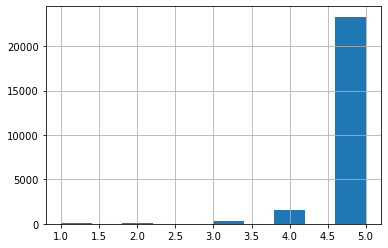

In [53]:
restaurants_latest_clean.rating.hist()

## Read in Yelp Data

In [54]:
# read in yelp data and tranform the phone column
yelp = pd.read_csv("yelp.csv")
yelp.columns = yelp.columns.str.lower().str.replace(" ", "_")
yelp.shape

(24946, 9)

In [55]:
# remove the leading + sign from the phone column
yelp.phone_ls = yelp.phone_ls.str.replace("+", "").str.strip().str[1:]

# remmove the first column that is not useful
yelp = yelp.drop(yelp.columns[0], axis=1)

## Merge Inspection Data with Yelp Data

1. The only column that can be used to join is phone number.   
2. camis and camis_ls are from different systems. They are vastly different (can't be used for data mapping)
3. latitude and longtitude are used to match the closest restaurants whenever many chain restaurants share the same phone number

In [56]:
# join inspecation data with yelp data
resto_yelp = restaurants_latest_clean.merge(yelp, how="inner", left_on="phone", right_on="phone_ls")
resto_yelp.shape

(32113, 35)

In [57]:
# remove data with missing latitude or longtitude

resto_yelp["latitude"] = resto_yelp["latitude"].fillna(0)
resto_yelp["longitude"] = resto_yelp["longitude"].fillna(0)
resto_yelp["lat"] = resto_yelp["lat"].fillna(0)
resto_yelp["lon"] = resto_yelp["lon"].fillna(0)

la_long_conditions = (resto_yelp.latitude != 0) & (resto_yelp.longitude !=0)  & (resto_yelp.lat !=0)  & (resto_yelp.lon !=0)

resto_yelp = resto_yelp.loc[la_long_conditions]
resto_yelp = resto_yelp.loc[resto_yelp.phone != "0000000000"]
resto_yelp.shape

(29175, 35)

In [58]:
from math import cos, asin, sqrt, pi

def get_distance_df(row):
    lat1, lon1, lat2, lon2 = row["latitude"], row["longitude"], row["lat"] , row["lon"] 
    p = pi/180
    a = 0.5 - cos((lat2-lat1)*p)/2 + cos(lat1*p) * cos(lat2*p) * (1-cos((lon2-lon1)*p))/2
    row["distance"] = 12742 * asin(sqrt(a)) * 0.621371
    return row

In [59]:
# calculate the distance between airbnb rental and restaurant
resto_yelp = resto_yelp.apply(get_distance_df, axis=1)

In [60]:
# if phone is the same, choose the nearest resturant
resto_yelp = resto_yelp.sort_values(by=["phone", "distance"], ascending=[True, True]).drop_duplicates(subset=['phone'])
resto_yelp.shape

(20676, 36)

## A Scoring System

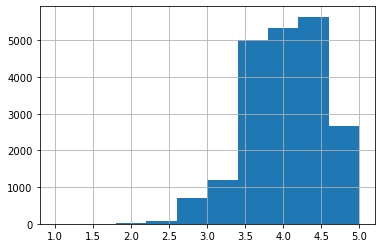

In [61]:
# a super simple scoring
# note that the lower hygiene score is, the better. The higher rating is, the better. 

resto_yelp["new_rating"] = 0.4 * resto_yelp["rating_x"] +  0.6 * resto_yelp["rating_y"]
resto_yelp["new_rating"] = resto_yelp["new_rating"].round(2)
resto_yelp.new_rating.hist()
plt.show()

## Export Data

In [62]:
# Deliver full clean data for visualization purpose

restaurants_history_clean = restaurants_history_clean[restaurants_history_clean.camis.isin(resto_yelp.camis)]
restaurants_history_clean = restaurants_history_clean.sort_values(by=["camis", "inspection_date"], ascending=[True, False])

restaurants_history_clean = restaurants_history_clean.drop(columns=["community_board", "council_district", "census_tract", "bin", "bbl", "nta"])

restaurants_history_clean.to_csv("restaurants_history_clean.csv", index=None)

In [63]:
# Deliver history clean data for visualization purpose

restaurants_full_clean = restaurants[restaurants.camis.isin(resto_yelp.camis)]
restaurants_full_clean.sort_values(by=["camis", "inspection_date"], ascending=[True, False])
restaurants_full_clean = restaurants_full_clean.drop(columns=["community_board", "council_district", "census_tract", "bin", "bbl", "nta"])

restaurants_full_clean.to_csv("restaurants_full_clean.csv", index=None)

In [64]:
resto_yelp = resto_yelp.drop(columns=["community_board", "council_district", "census_tract", "bin", "bbl", "nta", "camis_ls", "phone_ls", "id"])
resto_yelp.to_csv("resto_yelp.csv", index=None)

## Test Correlation Between Score and Rating

### Assume rating is a numerical continuous value

In [65]:
# test if there is any correlation between score and rating, if rating is treated as numerical continous values
Pearson = resto_yelp.loc[:, ["score", "rating_y"]].corr(method = "pearson")
Kendall = resto_yelp.loc[:, ["score", "rating_y"]].corr(method = "kendall")
Spearman = resto_yelp.loc[:, ["score", "rating_y"]].corr(method = "spearman")

print(Pearson)
print(Kendall)
print(Spearman)

             score  rating_y
score     1.000000 -0.017643
rating_y -0.017643  1.000000
             score  rating_y
score     1.000000 -0.007156
rating_y -0.007156  1.000000
             score  rating_y
score     1.000000 -0.009418
rating_y -0.009418  1.000000


### Assume rating is a categorial value

In [66]:
# test if there is any correlation between score and rating_y, if rating_y is treated as categorial values
from scipy.stats import kruskal
d_1 = resto_yelp.loc[resto_yelp.rating_y == 1, "score"]
d_1_5 = resto_yelp.loc[resto_yelp.rating_y == 1.5, "score"]
d_2 = resto_yelp.loc[resto_yelp.rating_y == 2, "score"]
d_2_5 = resto_yelp.loc[resto_yelp.rating_y == 2.5, "score"]
d_3 = resto_yelp.loc[resto_yelp.rating_y == 3, "score"]
d_3_5 = resto_yelp.loc[resto_yelp.rating_y == 3.5, "score"]
d_4 = resto_yelp.loc[resto_yelp.rating_y == 4, "score"]
d_4_5 = resto_yelp.loc[resto_yelp.rating_y == 4.5, "score"]

kruskal(d_1,d_1_5,d_2,d_2_5,d_3,d_3_5,d_4,d_4_5)

KruskalResult(statistic=2.712045368476524, pvalue=0.910302272360214)

In [67]:
yelp.rating.unique()

array([3. , 3.5, 4. , 2.5, 2. , 4.5, 1.5, 1. , 5. ])

## Cluster Hygiene Rating & Yelp Rating

Text(0, 0.5, 'yelp rating')

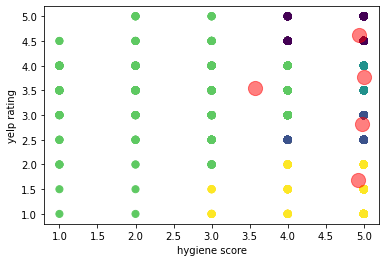

In [68]:
# This K-mean cluster is for research purpose.
# Per the graph, clusters are squeezed in higher hygiene score that are also the majority of data points

X= resto_yelp[["rating_x", "rating_y"]] # hygiene_score , yelp_rating

kmeans = KMeans(n_clusters=5, random_state=0)
kmeans.fit(X)
y_predicted = kmeans.predict(X)


plt.scatter(X["rating_x"], X["rating_y"], c= y_predicted, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)

plt.xlabel("hygiene score")
plt.ylabel("yelp rating")

# Calculate Distances between Airbnb and Restaurants

### Define distance function

In [69]:
from math import cos, asin, sqrt, pi

def get_distance(lat1, lon1, lat2, lon2):
    p = pi/180
    a = 0.5 - cos((lat2-lat1)*p)/2 + cos(lat1*p) * cos(lat2*p) * (1-cos((lon2-lon1)*p))/2
    return 12742 * asin(sqrt(a)) * 0.621371

### Read in airbnb data

In [70]:
airbnb = pd.read_csv("airbnb.csv")
airbnb.shape

(46527, 74)

### Calcuate the nearst 100 resturant for each airbnb rental

In [71]:
import csv

def get_top_10(num_nearest = 100, top_k = 10, rating_column = "", filename = ""):
    a = airbnb.loc[:, ["id", "latitude", "longitude"]].values.tolist()
    b = resto_yelp.loc[:, ["camis", "latitude", "longitude", rating_column]].values.tolist()

    res = []
    for airbnb_id, airbnb_lat, airbnb_lon in a:
        distance_list = []
        for resto_id, resto_lat, resto_lon, resto_score in b:
            d = get_distance(airbnb_lat, airbnb_lon, resto_lat, resto_lon)
            distance_list.append([airbnb_id, resto_id, d, resto_score])

        d_s = sorted(distance_list, key=lambda x: x[2])[:num_nearest]
        d_s_top_k = sorted(d_s, key=lambda x: x[3], reverse=True)[:top_k]
        res.extend(d_s_top_k)
    
    # convert id and camis to integer
    res1 = [ [int(a), int(b), c, d] for a, b, c, d in res ]
    res1.insert(0, ["airbnb_id", "camis", "distance", "rating"])
    
    # write to one to many data set for visualization purpose
    with open(filename, 'w+', newline='') as f:
        write = csv.writer(f)
        write.writerows(res1)

get_top_10(rating_column = "new_rating", filename = "airbnb_resto_1_to_many.csv")
get_top_10(rating_column = "rating_y", filename = "airbnb_resto_1_to_many_yelp_rating.csv")

In [75]:
com = pd.read_csv('airbnb_resto_1_to_many.csv')
yelp = pd.read_csv('airbnb_resto_1_to_many_yelp_rating.csv')

com_p = com.pivot_table(index='airbnb_id',values='camis', aggfunc = {'camis':lambda x: sorted(list(x.values))})
yelp_p = yelp.pivot_table(index='airbnb_id',values='camis', aggfunc = {'camis':lambda x: sorted(list(x.values))})
eva = com_p.join(yelp_p, how = 'inner', on ='airbnb_id', lsuffix = 'com_list', rsuffix = 'yelp_list')
eva['MATCH'] = eva.apply(lambda x: "YES" if x['camiscom_list'] == x['camisyelp_list'] else "NO", axis=1)

In [74]:
# check the ratio of different recommends using new rating compared to using yelp rating
sum(eva["MATCH"] == "NO") / eva.shape[0]

0.5515507124895223